In [9]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/DL Lab/Lab7/code')

Mounted at /content/drive


In [10]:
import torch
from utils import *
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt

In [11]:
# Data parameters
srgan_checkpoint = "/content/drive/MyDrive/Colab Notebooks/DL Lab/Lab7/code/saved_checkpoints/checkpoint_srgan2.pth.tar"
HR_image_path = '/content/drive/MyDrive/Colab Notebooks/DL Lab/Lab7/data/benchmark/Set14/HR/baboon.png'
LR_image_path = '/content/drive/MyDrive/Colab Notebooks/DL Lab/Lab7/data/benchmark/Set14/LR_bicubic/X4/baboonx4.png'
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
#device = torch.device("cpu")

In [12]:
# Load models
srgan_generator = torch.load(srgan_checkpoint)['generator'].to(device)
srgan_generator.eval()

Generator(
  (conv1): Conv2d(3, 64, kernel_size=(9, 9), stride=(1, 1), padding=(4, 4))
  (prelu): PReLU(num_parameters=1)
  (block1): Sequential(
    (0): _residualBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (prelu): PReLU(num_parameters=1)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): _residualBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (prelu): PReLU(num_parameters=1)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (2): _residual

In [13]:
hr_img = Image.open(HR_image_path, mode="r")
hr_img = hr_img.convert('RGB')
lr_img = Image.open(LR_image_path, mode="r")
lr_img = lr_img.convert('RGB')

In [14]:
# Bicubic Upsampling
bicubic_img = lr_img.resize((hr_img.width, hr_img.height), Image.BICUBIC)
# Super-resolution (SR) with SRGAN
sr_img_srgan = srgan_generator(convert_image(lr_img, source='pil', target='imagenet-norm', device=device).unsqueeze(0).to(device))
sr_img_srgan = sr_img_srgan.squeeze(0).detach()
sr_img_srgan = convert_image(sr_img_srgan, source='[-1, 1]', target='pil', device=device)

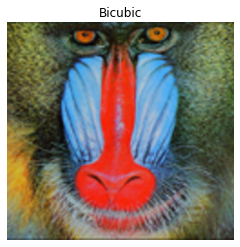

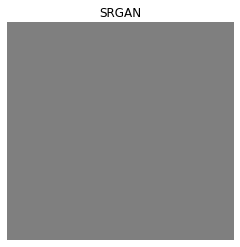

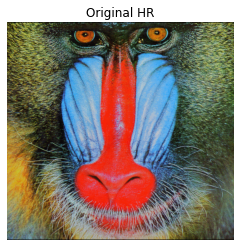

In [15]:
# Visualization
plt.figure('Bicubic')
plt.imshow(bicubic_img)
plt.axis('off')
plt.title('Bicubic')
plt.figure('SRGAN')
plt.imshow(sr_img_srgan)
plt.axis('off')
plt.title('SRGAN')
plt.figure('Original HR')
plt.imshow(hr_img)
plt.axis('off')
plt.title('Original HR')
plt.show()